Epoch [200/2000], Loss: 370.4682
Epoch [400/2000], Loss: 358.7607
Epoch [600/2000], Loss: 356.9286
Epoch [800/2000], Loss: 355.8139
Epoch [1000/2000], Loss: 354.8143
Epoch [1200/2000], Loss: 353.8857
Epoch [1400/2000], Loss: 353.0211
Epoch [1600/2000], Loss: 352.2157
Epoch [1800/2000], Loss: 351.4657
Epoch [2000/2000], Loss: 350.7671


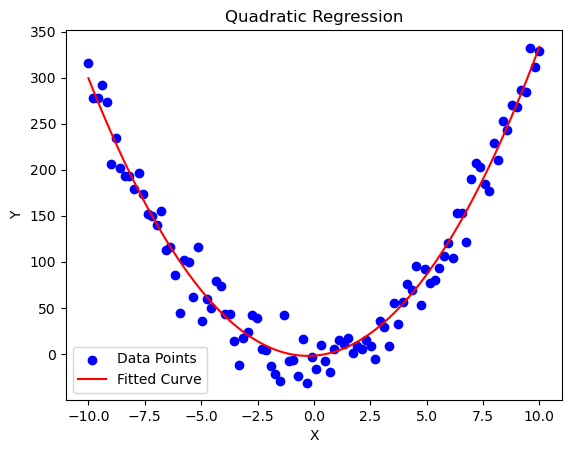

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

np.random.seed(0)
x = np.linspace(-10, 10, 100)
a, b, c = 3, 2, 1 
y = a * x**2 + b * x + c + np.random.normal(0, 20, 100)

x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

class QuadraticRegressionModel(nn.Module):
    def __init__(self):
        super(QuadraticRegressionModel, self).__init__()
        self.poly = nn.Linear(3, 1)

    def forward(self, x):
        x_poly = torch.cat([x**2, x, torch.ones_like(x)], dim=1)
        return self.poly(x_poly)

model = QuadraticRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = model(x_tensor)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, predicted.numpy(), color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Regression')
plt.legend()
plt.show()